# DECISION TREE CLASSIFIER (C5.0) 


## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing , tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## DATA PREPROCESSING

### Understanding basic information of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.shape

(400, 11)

In [6]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
data['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [10]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


### Converting the dependent variable to categorical 

In [11]:
data['Sales']=np.where(data['Sales']<data['Sales'].mean(),'Low','High')
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


### Visualization

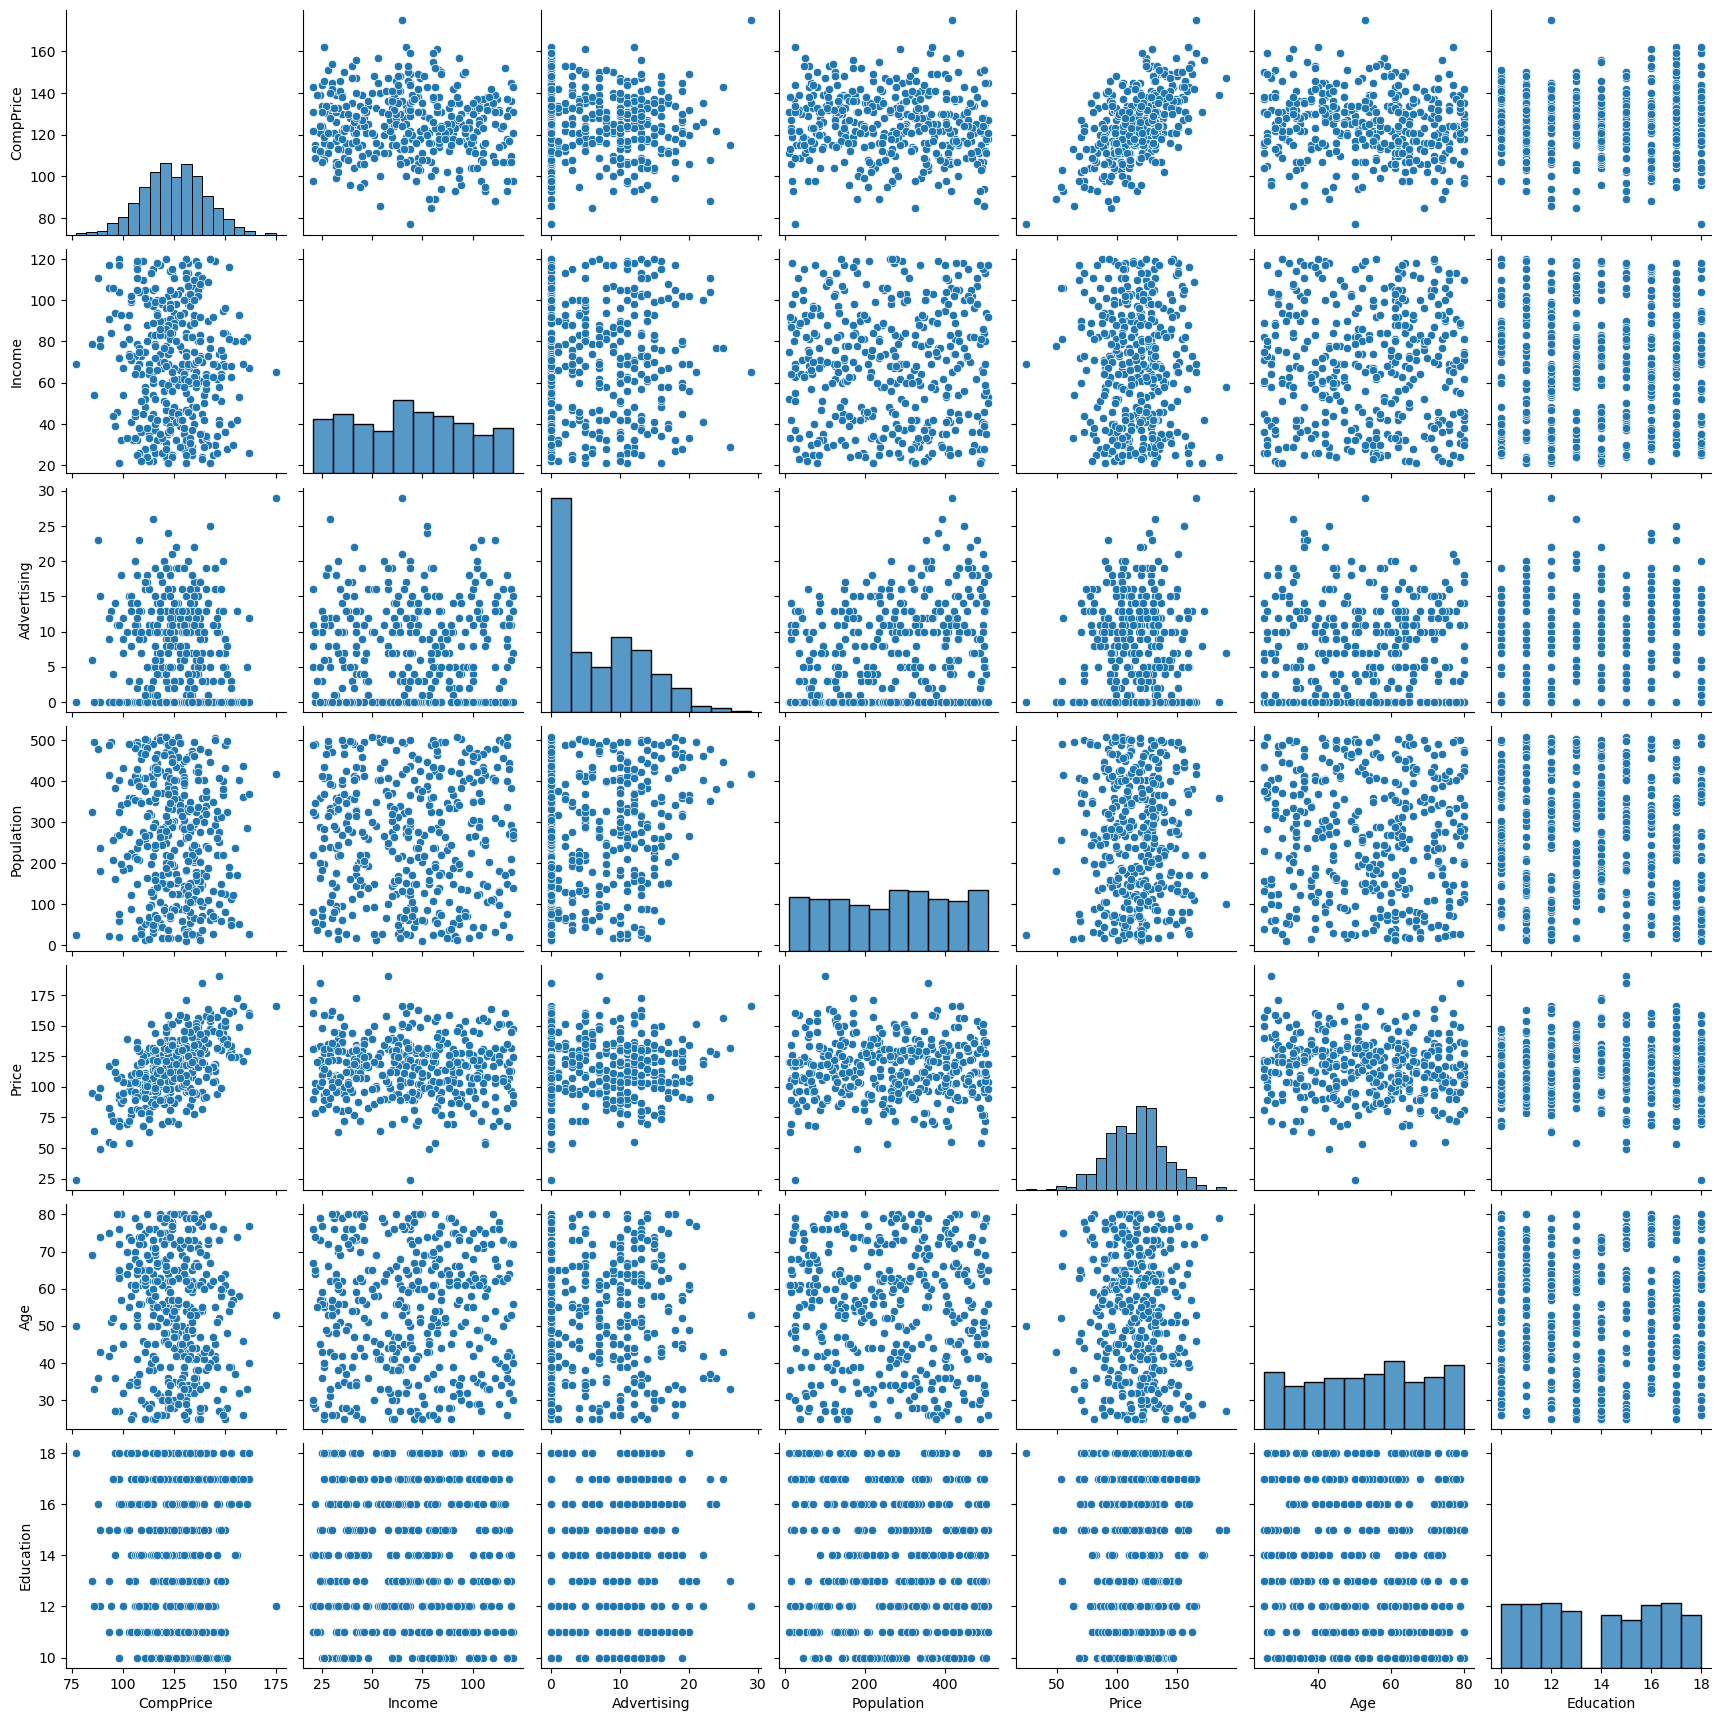

In [12]:
sns.pairplot(data = data)

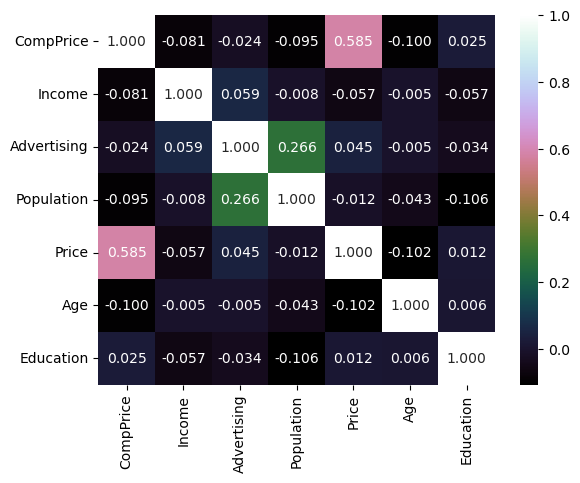

In [13]:
sns.heatmap(data.corr(),cmap='cubehelix',annot= True , fmt='.3f')
plt.show()

### Label Encoding

In [14]:
data['Sales'].unique()

array(['High', 'Low'], dtype=object)

In [15]:
label_encoder = preprocessing.LabelEncoder()
data['Sales'] = label_encoder.fit_transform(data['Sales'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [16]:
#data['Sales']=data['Sales'].astype('category')
data['ShelveLoc']=data['ShelveLoc'].astype('category')
data['Urban']=data['Urban'].astype('category')
data['US']=data['US'].astype('category')

In [17]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [18]:
data.Sales.unique()

array([0, 1])

In [19]:
data.ShelveLoc.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [20]:
data.Urban.unique()

[1, 0]
Categories (2, int64): [0, 1]

In [21]:
data.US.unique()

[1, 0]
Categories (2, int64): [0, 1]

### Seperate Dependent and Independent Features

In [22]:
array = data.values
x = array[:,1:11]
y = array[:,0]

### Splitting Data Into Training and Testing

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=50)

## BUILDING THE MODEL

In [24]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3).fit(x_train,y_train)
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

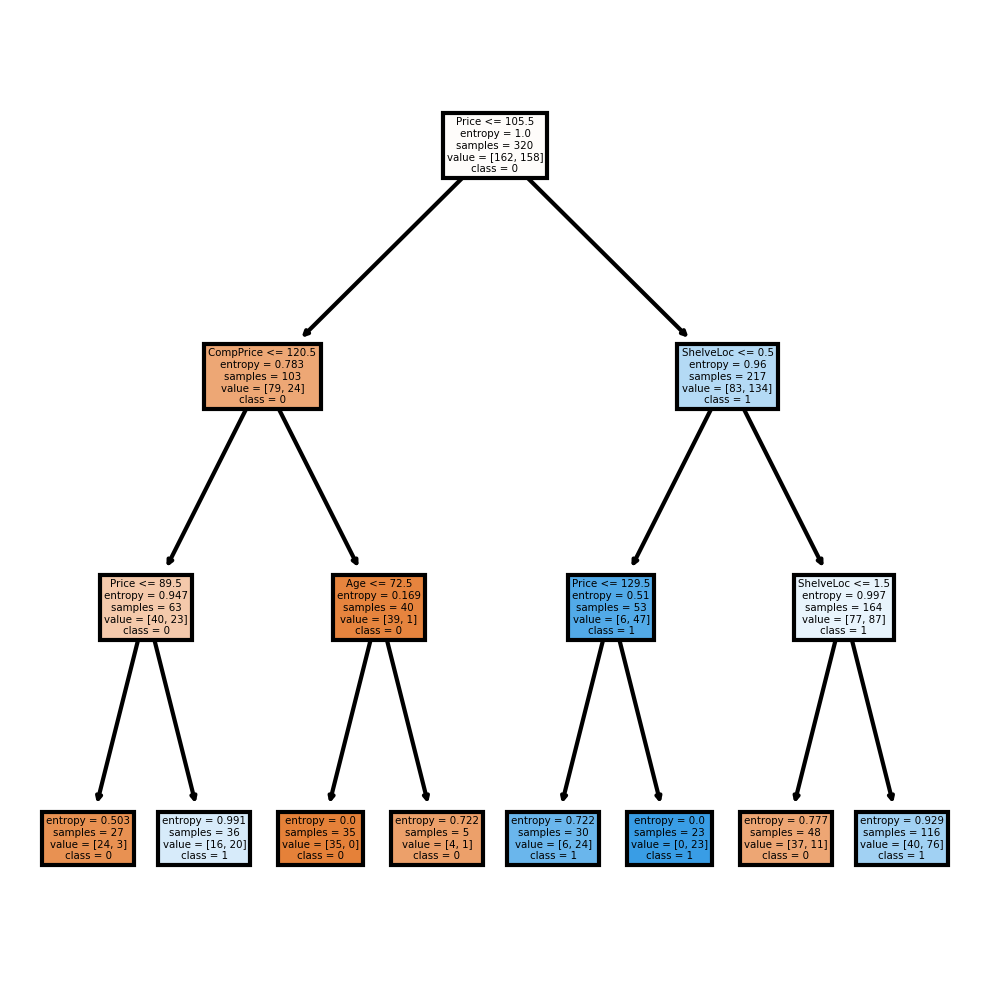

In [25]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,)
plt.show()

In [26]:
model.feature_importances_

array([0.1422612 , 0.        , 0.        , 0.        , 0.46586597,
       0.36061392, 0.03125891, 0.        , 0.        , 0.        ])

## Visualizing Important Features

<function matplotlib.pyplot.show(close=None, block=None)>

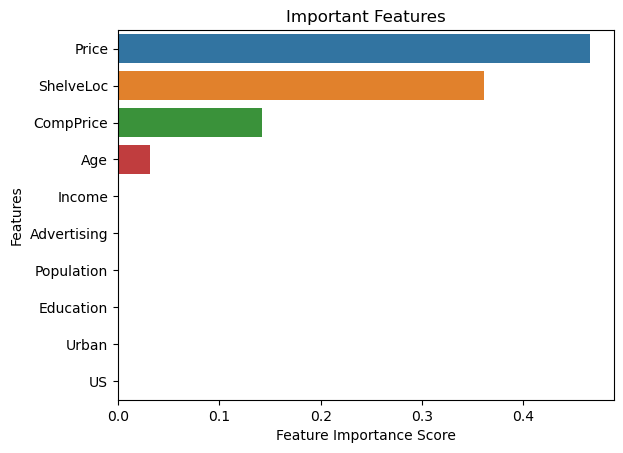

In [27]:
impfeatures=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
sns.barplot(x=impfeatures,y=impfeatures.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show

## Predicting On The Data

In [28]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    49
0    31
dtype: int64

In [29]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,23,14
1,8,35


## CALCULATING ACCURACY

In [30]:
np.mean(preds==y_test)

0.725

# The accuraacy of Decision Tree C5.0 model is 72.5%


### We can use a different model of decision tree improve the accuracy of the model

# DECISION TREE CLASSIFIER (CART)

In [31]:
model_gini = DecisionTreeClassifier(criterion='gini' , max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

## PREDICTION 

In [32]:
pred = model_gini.predict(x_test)
pd.Series(pred).value_counts()

1    44
0    36
dtype: int64

In [33]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,26,11
1,10,33


## CALCULATING ACCURACY

In [34]:
np.mean(pred == y_test)

0.7375

# DECISION TREE (REGRESSION) MODEL

In [35]:
array = data.values
x = array[:,1:11]
y = array[:,0]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=35)

In [37]:
model_reg = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)

In [38]:
model_reg.score(x_test,y_test)

0.27995997207775747

In [39]:
pre=model_reg.predict(x_test)
pd.Series(pre).value_counts()

0.640777    43
0.230769    21
0.000000    20
0.921053    19
0.558824    17
0.050000     8
0.200000     3
0.333333     1
dtype: int64

In [40]:
np.mean(pre == y_test)

0.13636363636363635

In [41]:
model_reg.feature_importances_

array([0.14092571, 0.        , 0.        , 0.        , 0.47217672,
       0.37953759, 0.00735998, 0.        , 0.        , 0.        ])

<function matplotlib.pyplot.show(close=None, block=None)>

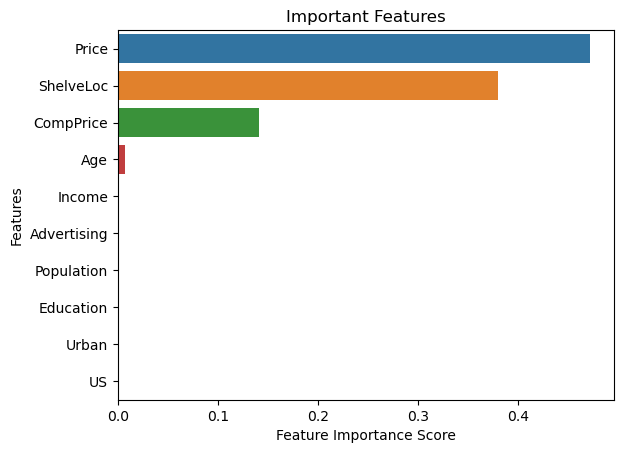

In [42]:
impfeature=pd.Series(model_reg.feature_importances_,index=fn).sort_values(ascending=False)
sns.barplot(x=impfeature,y=impfeature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show